# Assignment 2

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Linear Regression

Let's set up our workspace and use the **Auto MPG dataset**. This dataset contains several features (such as horsepower, weight, displacement, and acceleration) and a target variable indicating the car's **miles per gallon (MPG)**.

Here, we will model **MPG (continuous outcome)** based on the car's physical and performance characteristics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
import seaborn as sns

mpg_data = sns.load_dataset('mpg')

mpg_data = mpg_data.dropna(subset=['mpg', 'horsepower', 'weight', 'displacement'])

mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


#### **Question 1:**  
#### Data inspection

Before fitting any model, it is essential to understand our data. **Use Python code** to answer the following questions about the **Auto MPG dataset**:

_(i)_ How many observations (rows) does the dataset contain and also how many variables (columns) does the dataset contain?

In [20]:
# Number of observations (rows) and variables (columns)
num_observations, num_variables = mpg_data.shape

# Print the number of observations and variables
print(f'Number of observations (rows): {num_observations}')
print(f'Number of variables (columns): {num_variables}')

Number of observations (rows): 398
Number of variables (columns): 9


_(ii)_ What is the 'variable type' of the response variable `mpg` (e.g., 'integer', 'category', etc.) and explain what it is in short? (1-2 sentences at max)

In [25]:
# Check the variable type of 'mpg'
mpg_variable_type = mpg_data['mpg'].dtype
print(f"The variable type of 'mpg' is: {mpg_variable_type}")

The variable type of 'mpg' is: float64


The response variable mpg (miles per gallon) is a continuous numerical variable. It represents a quantitative measure of fuel efficiency, indicating how many miles a vehicle can travel per gallon of fuel consumed.


_(iii)_ Find the 5 rows with the greatest `horsepower`.

In [29]:
# Find the 5 rows with the greatest horsepower
top_horsepower = mpg_data.nlargest(5, 'horsepower')

# Display the result
print("Top 5 rows with the greatest horsepower:")
print(top_horsepower)

Top 5 rows with the greatest horsepower:
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
116  16.0          8         400.0       230.0    4278           9.5   
8    14.0          8         455.0       225.0    4425          10.0   
13   14.0          8         455.0       225.0    3086          10.0   
95   12.0          8         455.0       225.0    4951          11.0   
6    14.0          8         454.0       220.0    4354           9.0   

     model_year origin                      name  
116          73    usa        pontiac grand prix  
8            70    usa          pontiac catalina  
13           70    usa   buick estate wagon (sw)  
95           73    usa  buick electra 225 custom  
6            70    usa          chevrolet impala  


_(iv)_ How many predictor variables do we have (Hint: all variables other than `mpg`)?

In [32]:
# List of predictor variables (excluding 'mpg')
predictor_variables = mpg_data.columns.drop('mpg')

# Number of predictor variables
num_predictor_variables = len(predictor_variables)

# Print the result
print(f'Number of predictor variables: {num_predictor_variables}')


Number of predictor variables: 8


You can use `print()` and `describe()` to help answer these questions.

#### **Question 2:** 
#### Data-visualization

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below.

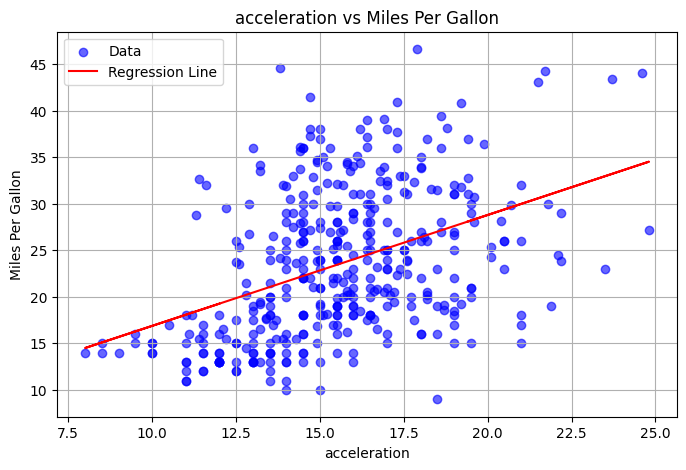

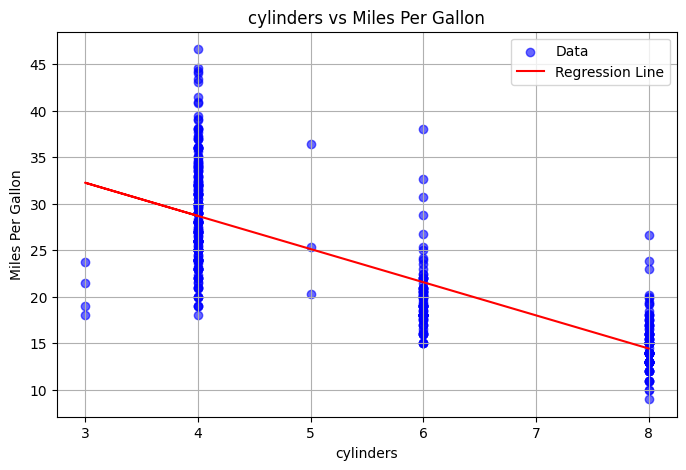

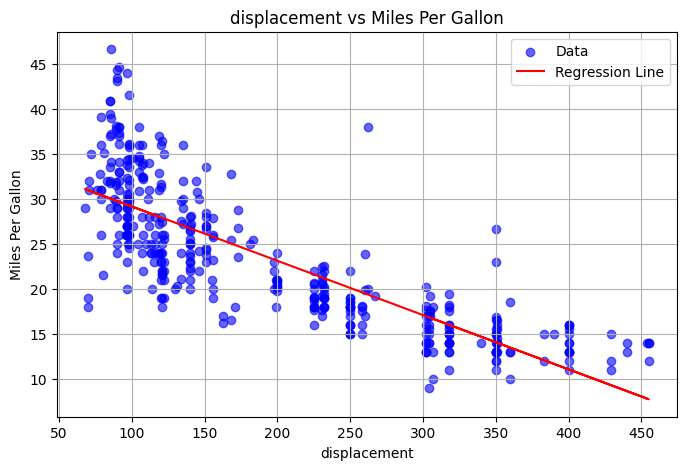

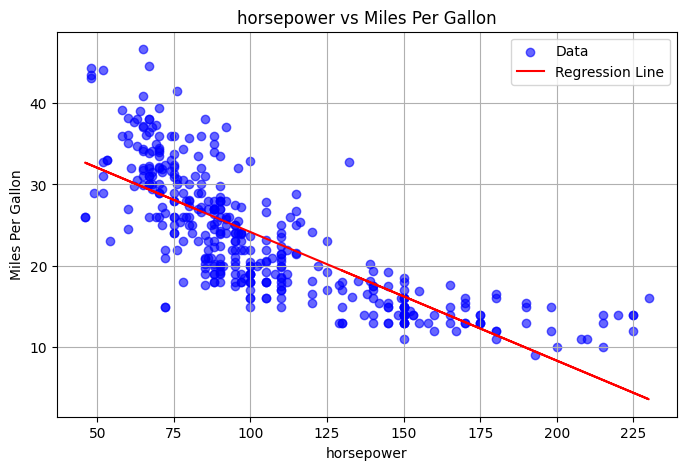

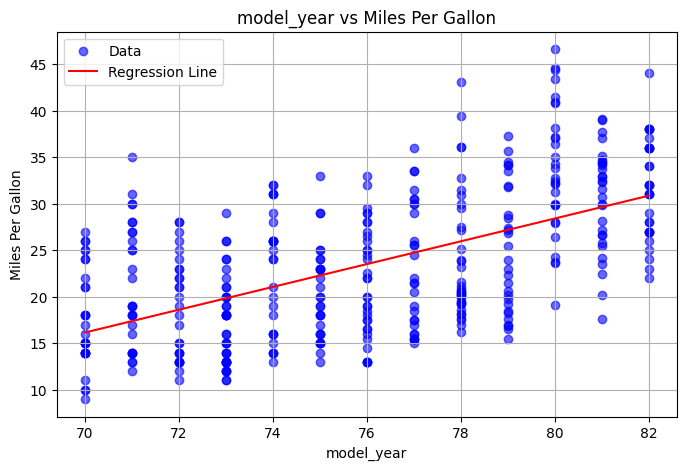

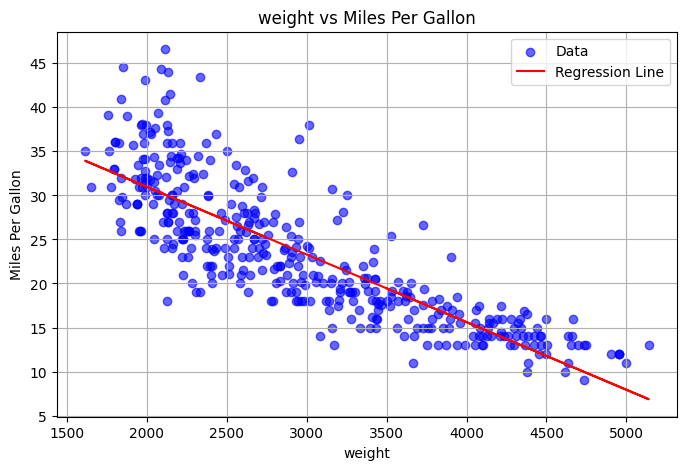

In [35]:
# Exclude the 'mpg' (target variable) and non-numeric columns from the feature names
feature_names = mpg_data.select_dtypes(include=[float, int]).columns.difference(['mpg'])

# Loop through each numeric feature (column) in mpg_data
for feature in feature_names:
    # Extract the feature column and target variable (mpg)
    X_feature = mpg_data[[feature]].values  # Extract as a 2D array
    y = mpg_data['mpg'].values  # Target variable (mpg)

    # Drop any rows with NaN values in either X_feature or y
    mask = ~np.isnan(X_feature).flatten() & ~np.isnan(y)
    X_feature_clean = X_feature[mask]
    y_clean = y[mask]

    # Create a scatter plot for the feature against the target (mpg)
    plt.figure(figsize=(8, 5))
    plt.scatter(X_feature_clean, y_clean, label='Data', color='blue', alpha=0.6)

    # Fit a linear regression model
    lm = LinearRegression()
    lm.fit(X_feature_clean, y_clean)

    # Plot the regression line
    plt.plot(X_feature_clean, lm.predict(X_feature_clean), color='red', label='Regression Line')

    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('Miles Per Gallon')
    plt.title(f'{feature} vs Miles Per Gallon')

    # Add grid for better readability
    plt.grid()

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()



Answer the following questions:

_(i)_ Describe the associations being plotted ? (i.e., positive association, negative association, no association)

Mostly a negative association across all graphs except 'acceleration vs miles per gallon' and 'model_year vs miles per gallon' which are psoitive associations.

_(ii)_ What concept ‘defines’ the plotted line?

The plotted line in each scatter plot represents the linear regression line, which is defined by the concept of linear relationships between the predictor variable (feature) and the response variable (MPG)

_(iii)_ Do all data points in the dataset fall perfectly along the plotted line? If not, why might there be deviations between the data points and the line, and what do these deviations indicate about the relationship between the variables?

No, not all data points fall perfectly along the plotted line. These deviations, called residuals, occur because the relationship between the predictor and mpg is not perfectly linear, and other factors may influence mpg. The residuals indicate that the model does not fully explain the variability in the target variable.

#### **Question 3:**  
#### Model fit  
Now, let’s fit a multivariable linear regression model using the general syntax `lm()`. As above, use **mpg** as the response variable **Y**, and all other variables as the predictors.

**Step 1: Split the dataset into train and test sets, using a 75-25 split. (use random_state=42)**

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset from seaborn
import seaborn as sns
mpg_data = sns.load_dataset('mpg')

# Drop rows with missing values in relevant columns
mpg_data = mpg_data.dropna(subset=['mpg', 'horsepower', 'weight', 'displacement'])

# Prepare the data
X = mpg_data.drop(columns=['mpg', 'name', 'origin'])  # Predictor variables (excluding 'mpg', 'name', and 'origin')
y = mpg_data['mpg']  # Response variable (mpg)

# Split the dataset into train and test sets (75-25 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a Linear Regression model
lm = LinearRegression()

# Fit the model to the training data
lm.fit(X_train, y_train)

# Display the coefficients of the model
coefficients = lm.coef_
intercept = lm.intercept_

# Print coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [-1.60142765e-01  3.73447288e-04 -1.89866545e-03 -6.45678716e-03
  5.75878495e-02  7.62270091e-01]
Intercept: -15.047370795059038


**Step 2: Fit the linear regression model.**

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare the data
X = mpg_data.drop(columns=['mpg', 'name', 'origin'])  # Numeric predictors (excluding categorical)
y = mpg_data['mpg']  # Response variable (mpg)

# Split the dataset into train and test sets (75-25 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Store the numeric predictors for DataFrame creation
numeric_predictors = X_train

# Create a DataFrame containing the slope (coefficients) and intercept
coefficients_df = pd.DataFrame({
    "predictor": numeric_predictors.columns,
    "slope": lm.coef_,
    "intercept": [lm.intercept_] * len(lm.coef_)
})

# Display the coefficients DataFrame
print(coefficients_df)

      predictor     slope  intercept
0     cylinders -0.160143 -15.047371
1  displacement  0.000373 -15.047371
2    horsepower -0.001899 -15.047371
3        weight -0.006457 -15.047371
4  acceleration  0.057588 -15.047371
5    model_year  0.762270 -15.047371


#### **Question 4:** 
#### RMSPE
**Step 3. Finally, we predict on the test data set to assess how well our model does.** 

We will evaluate our final model's test error measured by RMSPE.

In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict the mpg values for the test set
y_pred = lm.predict(X_test)

# Calculate the RMSPE (Root Mean Squared Percentage Error)
def rmspe(y_true, y_pred):
    # Avoid division by zero by adding a small constant (e.g., 1e-10)
    return np.sqrt(np.mean(np.square((y_true - y_pred) / (y_true + 1e-10)))) * 100

# Compute RMSPE
rmspe_value = rmspe(y_test, y_pred)

# Print the RMSPE result
print(f"RMSPE: {rmspe_value:.2f}%")


RMSPE: 16.05%


# Criteria

| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is inspected for the number of variables, observations, and data types. | Data inspection is missing or incomplete.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots, histograms) are properly interepreted to explore the relationships between variables. | Data visualization were not correctly interpreted. |
| **Model Initialization**                               | The linear regression model is correctly initialized.            | The linear regression model is not initialized or is incorrect. |
| **Model Evaluation on Test Data**                      | The model is evaluated on the test data using appropriate metrics (e.g., RMSE). | The model evaluation is missing or uses the wrong metric. |


## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
